In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
file_path = '/content/drive/MyDrive/Market_anomaly_detection/FinancialMarketData.xlsx_Download.csv'
data = pd.read_csv(file_path, skiprows=5, header=0)

# Display the first few rows to ensure we only have the actual data
print("Dataset after skipping the first 5 rows:")
data.head()

Dataset after skipping the first 5 rows:


Unnamed: 0 Unnamed: 1     Ticker  XAU BGNL Curncy  ECSURPUS Index  \
0           NaN        NaN        NaN           284.25             NaN   
1           NaN        NaN  4/27/1999           282.25             NaN   
2         Depth    ED-22AY   5/4/1999           285.55             NaN   
3          Date    PX_Last  5/11/1999           278.25             NaN   
4  Days (T/W/A)          W  5/18/1999           273.95             NaN   

   BDIY Index  CRY Index  DXY Curncy  JPY Curncy  GBP Curncy  ...  TY1 Comdty  \
0         NaN        NaN         NaN         NaN         NaN  ...         NaN   
1       995.0     134.65      100.63      120.44       1.617  ...     115.563   
2      1095.0     139.04      100.68      120.77       1.626  ...     114.313   
3      1121.0     136.78      100.24      121.07       1.621  ...     113.344   
4      1061.0     133.90      100.72      123.21       1.621  ...     112.344   

   GC1 Comdty  CO1 Comdty  ES1 Index  VG1 Index  NQ1 Index  LLL1 Index  \
0         NaN         NaN        NaN        NaN        NaN         NaN   
1       282.3       15.80    1376.50     3726.0        NaN         NaN   
2       286.9       16.93    1343.00     3740.0        NaN         NaN   
3       278.8       15.96    1358.25     3690.0        NaN         NaN   
4       274.2       15.14    1341.25     3595.0        NaN         NaN   

   TP1 Index  DU1 Comdty  TU2 Comdty  
0        NaN         NaN         NaN  
1     1347.5      105.69     104.898  
2     1328.5      105.58     104.664  
3     1343.5      105.67     104.406  
4     1323.5      105.60     104.141  

[5 rows x 60 columns]

In [4]:
# Summary of the dataset
data.info()

# Check for missing values
data.isnull().sum()

# Display basic statistics for numeric columns
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149 entries, 0 to 1148
Data columns (total 60 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       8 non-null      object 
 1   Unnamed: 1       8 non-null      object 
 2   Ticker           1148 non-null   object 
 3   XAU BGNL Curncy  1149 non-null   float64
 4   ECSURPUS Index   1111 non-null   float64
 5   BDIY Index       1148 non-null   float64
 6   CRY Index        1148 non-null   float64
 7   DXY Curncy       1148 non-null   float64
 8   JPY Curncy       1148 non-null   float64
 9   GBP Curncy       1148 non-null   float64
 10  Cl1 Comdty       1148 non-null   float64
 11  VIX Index        1148 non-null   float64
 12  USGG30YR Index   1148 non-null   float64
 13  GT10 Govt        1148 non-null   float64
 14  USGG2YR Index    1148 non-null   float64
 15  USGG3M Index     1148 non-null   float64
 16  US0001M Index    1148 non-null   float64
 17  GTDEM30Y Govt 

XAU BGNL Curncy  ECSURPUS Index    BDIY Index    CRY Index  \
count      1149.000000     1111.000000   1148.000000  1148.000000   
mean        963.943969        0.036153   2224.171603   242.069200   
std         502.747086        0.349453   1994.811702    69.408742   
min         253.450000       -0.974000    291.000000   106.293000   
25%         419.750000       -0.191000    994.000000   182.947500   
50%        1109.330000        0.035000   1479.500000   225.172000   
75%        1315.610000        0.260500   2609.000000   300.475000   
max        2006.910000        0.991000  11793.000000   467.570000   

        DXY Curncy   JPY Curncy   GBP Curncy   Cl1 Comdty    VIX Index  \
count  1148.000000  1148.000000  1148.000000  1148.000000  1148.000000   
mean     91.253410   106.774974     1.571097    59.452169    20.119887   
std      11.332716    12.740605     0.209087    26.399325     8.539773   
min      71.329000    75.940000     1.172000    10.010000     9.430000   
25%      81.488250   102.002500     1.423000    37.205000    13.717500   
50%      90.169500   108.735000     1.565500    56.295000    18.205000   
75%      97.950500   116.432500     1.670000    79.027500    23.802500   
max     119.820000   134.630000     2.085000   140.970000    75.910000   

       USGG30YR Index  ...   TY1 Comdty   GC1 Comdty   CO1 Comdty  \
count     1148.000000  ...  1148.000000  1148.000000  1148.000000   
mean         3.978711  ...   119.211722   964.442857    62.495636   
std          1.222452  ...    10.331310   502.434956    29.991481   
min          1.163000  ...    94.125000   253.500000    14.550000   
25%          2.980000  ...   110.656000   420.150000    36.622500   
50%          4.198000  ...   119.883000  1110.850000    59.510000   
75%          4.903250  ...   127.051000  1317.025000    79.085000   
max          6.747000  ...   140.328000  2001.200000   140.670000   

         ES1 Index    VG1 Index     NQ1 Index   LLL1 Index    TP1 Index  \
count  1148.000000  1148.000000   1140.000000   705.000000  1148.000000   
mean   1675.228354  3276.210993   3504.439693  1064.444113  1285.979965   
std     711.763649   696.627166   2670.929548   128.954655   329.962967   
min     689.500000  1873.000000    814.500000   465.100000   704.000000   
25%    1173.625000  2778.750000   1633.437500  1103.600000   981.750000   
50%    1386.875000  3219.500000   2364.375000  1103.600000  1295.000000   
75%    2073.937500  3630.250000   4437.187500  1103.600000  1584.625000   
max    4132.800000  5448.000000  13975.750000  1323.900000  1978.000000   

        DU1 Comdty   TU2 Comdty  
count  1148.000000  1148.000000  
mean    107.972805   106.389095  
std       3.530101     3.452406  
min     101.190000    98.227000  
25%     104.595000   103.648000  
50%     108.267500   107.535000  
75%     111.392500   109.344000  
max     112.720000   110.527000  

[8 rows x 57 columns]

In [5]:
print(data.columns)

Index(['Unnamed: 0', 'Unnamed: 1', 'Ticker', 'XAU BGNL Curncy',
       'ECSURPUS Index', 'BDIY Index', 'CRY Index', 'DXY Curncy', 'JPY Curncy',
       'GBP Curncy', 'Cl1 Comdty', 'VIX Index', 'USGG30YR Index', 'GT10 Govt',
       'USGG2YR Index', 'USGG3M Index', 'US0001M Index', 'GTDEM30Y Govt',
       'GTDEM10Y Govt', 'GTDEM2Y Govt', 'EONIA Index', 'GTITL30YR Corp',
       'GTITL10YR Corp', 'GTITL2YR Corp', 'GTJPY30YR Corp', 'GTJPY10YR Corp',
       'GTJPY2YR Corp', 'GTGBP30Y Govt', 'GTGBP20Y Govt', 'GTGBP2Y Govt',
       'LUMSTRUU Index', 'LMBITR Index', 'LUACTRUU Index', 'LF98TRUU Index',
       'LG30TRUU Index', 'LP01TREU Index', 'EMUSTRUU Index', 'LF94TRUU Index',
       'MXUS Index', 'MXEU Index', 'MXJP Index', 'MXBR Index', 'MXRU Index',
       'MXIN Index', 'MXCN Index', 'MXWO Index', 'MXWD Index',
       'LEGATRUU Index', 'HFRXGL Index', 'RX1 Comdty', 'TY1 Comdty',
       'GC1 Comdty', 'CO1 Comdty', 'ES1 Index', 'VG1 Index', 'NQ1 Index',
       'LLL1 Index', 'TP1 Index', 'DU1 

In [6]:
# Drop columns with more than 50% missing values
threshold = 0.5
data = data.loc[:, data.isnull().mean() < threshold]

# Drop rows with excessive missing values
data = data.dropna(thresh=10)  # Keep rows with at least 10 non-NA values

# Drop specific columns (if known to be irrelevant)
data = data.drop(['Col1', 'Col2'], axis=1, errors='ignore')

# Preview the DataFrame
print("Preview After Dropping Columns:")
data.head()


Preview After Dropping Columns:


Ticker  XAU BGNL Curncy  ECSURPUS Index  BDIY Index  CRY Index  \
1  4/27/1999           282.25             NaN       995.0     134.65   
2   5/4/1999           285.55             NaN      1095.0     139.04   
3  5/11/1999           278.25             NaN      1121.0     136.78   
4  5/18/1999           273.95             NaN      1061.0     133.90   
5  5/25/1999           271.45             NaN      1017.0     132.09   

   DXY Curncy  JPY Curncy  GBP Curncy  Cl1 Comdty  VIX Index  ...  TY1 Comdty  \
1      100.63      120.44       1.617       17.81      23.36  ...     115.563   
2      100.68      120.77       1.626       18.92      25.62  ...     114.313   
3      100.24      121.07       1.621       18.06      25.62  ...     113.344   
4      100.72      123.21       1.621       17.11      27.26  ...     112.344   
5      101.38      122.85       1.602       17.14      28.90  ...     113.125   

   GC1 Comdty  CO1 Comdty  ES1 Index  VG1 Index  NQ1 Index  LLL1 Index  \
1       282.3       15.80    1376.50     3726.0        NaN         NaN   
2       286.9       16.93    1343.00     3740.0        NaN         NaN   
3       278.8       15.96    1358.25     3690.0        NaN         NaN   
4       274.2       15.14    1341.25     3595.0        NaN         NaN   
5       270.8       15.43    1284.50     3631.0        NaN         NaN   

   TP1 Index  DU1 Comdty  TU2 Comdty  
1     1347.5      105.69     104.898  
2     1328.5      105.58     104.664  
3     1343.5      105.67     104.406  
4     1323.5      105.60     104.141  
5     1307.0      105.68     104.289  

[5 rows x 58 columns]

In [7]:
# Fill missing values only in numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# For non-numeric columns (e.g., categorical), fill with mode or drop as needed
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

# Preview the dataset
print("Preview after handling missing values:")
data.head()


Preview after handling missing values:


Ticker  XAU BGNL Curncy  ECSURPUS Index  BDIY Index  CRY Index  \
1  4/27/1999           282.25        0.036153       995.0     134.65   
2   5/4/1999           285.55        0.036153      1095.0     139.04   
3  5/11/1999           278.25        0.036153      1121.0     136.78   
4  5/18/1999           273.95        0.036153      1061.0     133.90   
5  5/25/1999           271.45        0.036153      1017.0     132.09   

   DXY Curncy  JPY Curncy  GBP Curncy  Cl1 Comdty  VIX Index  ...  TY1 Comdty  \
1      100.63      120.44       1.617       17.81      23.36  ...     115.563   
2      100.68      120.77       1.626       18.92      25.62  ...     114.313   
3      100.24      121.07       1.621       18.06      25.62  ...     113.344   
4      100.72      123.21       1.621       17.11      27.26  ...     112.344   
5      101.38      122.85       1.602       17.14      28.90  ...     113.125   

   GC1 Comdty  CO1 Comdty  ES1 Index  VG1 Index    NQ1 Index   LLL1 Index  \
1       282.3       15.80    1376.50     3726.0  3504.439693  1064.444113   
2       286.9       16.93    1343.00     3740.0  3504.439693  1064.444113   
3       278.8       15.96    1358.25     3690.0  3504.439693  1064.444113   
4       274.2       15.14    1341.25     3595.0  3504.439693  1064.444113   
5       270.8       15.43    1284.50     3631.0  3504.439693  1064.444113   

   TP1 Index  DU1 Comdty  TU2 Comdty  
1     1347.5      105.69     104.898  
2     1328.5      105.58     104.664  
3     1343.5      105.67     104.406  
4     1323.5      105.60     104.141  
5     1307.0      105.68     104.289  

[5 rows x 58 columns]

# **Exploratory Data Analysis**

In [8]:
# Summary statistics for numeric columns
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
       XAU BGNL Curncy  ECSURPUS Index    BDIY Index    CRY Index  \
count      1148.000000     1148.000000   1148.000000  1148.000000   
mean        964.536037        0.036153   2224.171603   242.069200   
std         502.565287        0.343771   1994.811702    69.408742   
min         253.450000       -0.974000    291.000000   106.293000   
25%         419.862500       -0.182500    994.000000   182.947500   
50%        1112.860000        0.036153   1479.500000   225.172000   
75%        1315.635000        0.252500   2609.000000   300.475000   
max        2006.910000        0.991000  11793.000000   467.570000   

        DXY Curncy   JPY Curncy   GBP Curncy   Cl1 Comdty    VIX Index  \
count  1148.000000  1148.000000  1148.000000  1148.000000  1148.000000   
mean     91.253410   106.774974     1.571097    59.452169    20.119887   
std      11.332716    12.740605     0.209087    26.399325     8.539773   
min      71.329000    75.940000     1.172000    10.010000     

In [9]:
# Convert 'Ticker' column to datetime
data['Ticker'] = pd.to_datetime(data['Ticker'], errors='coerce')

# Set 'Ticker' as the index
data.set_index('Ticker', inplace=True)

# Display basic information
print("Dataset Overview:")
print(data.info())
print(data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1148 entries, 1999-04-27 to 2021-04-20
Data columns (total 57 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   XAU BGNL Curncy  1148 non-null   float64
 1   ECSURPUS Index   1148 non-null   float64
 2   BDIY Index       1148 non-null   float64
 3   CRY Index        1148 non-null   float64
 4   DXY Curncy       1148 non-null   float64
 5   JPY Curncy       1148 non-null   float64
 6   GBP Curncy       1148 non-null   float64
 7   Cl1 Comdty       1148 non-null   float64
 8   VIX Index        1148 non-null   float64
 9   USGG30YR Index   1148 non-null   float64
 10  GT10 Govt        1148 non-null   float64
 11  USGG2YR Index    1148 non-null   float64
 12  USGG3M Index     1148 non-null   float64
 13  US0001M Index    1148 non-null   float64
 14  GTDEM30Y Govt    1148 non-null   float64
 15  GTDEM10Y Govt    1148 non-null   float64
 16  GTDEM2Y Govt     1148 no

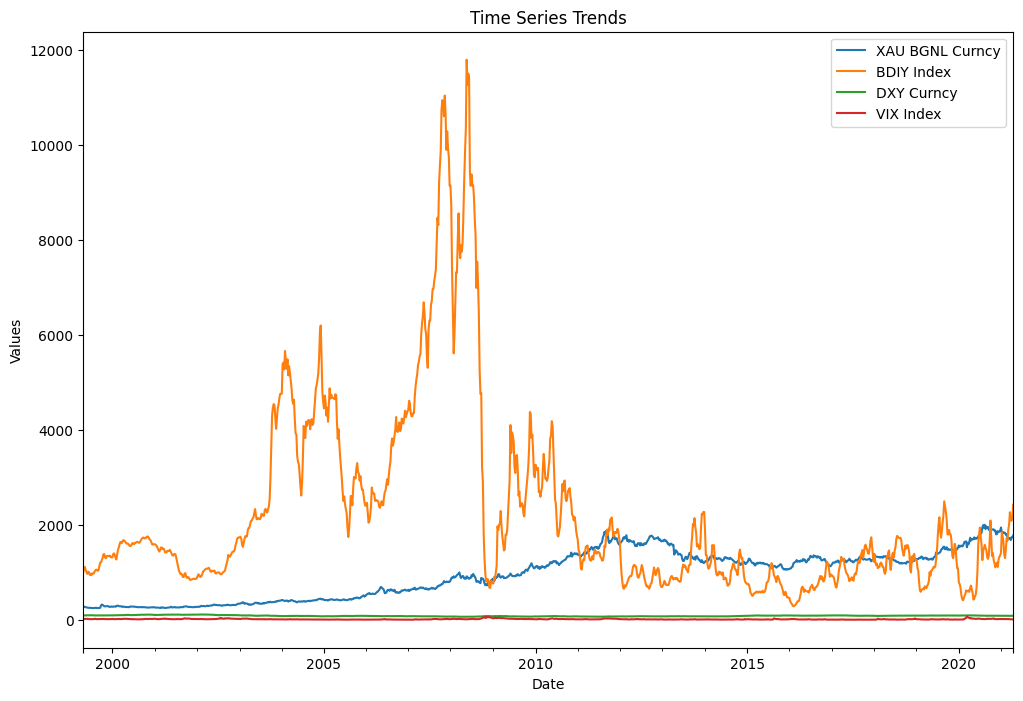

In [10]:
import matplotlib.pyplot as plt

# Plot a subset of features over time
features_to_plot = ['XAU BGNL Curncy', 'BDIY Index', 'DXY Curncy', 'VIX Index']  # Modify as needed
data[features_to_plot].plot(figsize=(12, 8), title="Time Series Trends")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend(features_to_plot)
plt.show()


In [11]:
from statsmodels.tsa.stattools import adfuller

# Automate ADF test for all numeric features
def batch_adf_test(data):
    results = {}
    for column in data.columns:
        if data[column].dtype in ['float64', 'int64']:
            adf_result = adfuller(data[column].dropna())
            results[column] = {
                'ADF Statistic': adf_result[0],
                'p-value': adf_result[1],
                'Conclusion': 'Stationary' if adf_result[1] < 0.05 else 'Not Stationary'
            }
    return pd.DataFrame(results).T

# Run the batch ADF test
adf_results = batch_adf_test(data)
print("ADF Test Results:")
print(adf_results)

# Filter non-stationary features
non_stationary_columns = adf_results[adf_results['Conclusion'] == 'Not Stationary'].index.tolist()
print("Non-Stationary Columns:", non_stationary_columns)


ADF Test Results:
                ADF Statistic   p-value      Conclusion
XAU BGNL Curncy     -0.554924  0.880846  Not Stationary
ECSURPUS Index      -6.535409       0.0      Stationary
BDIY Index          -2.404226  0.140547  Not Stationary
CRY Index            -2.42677  0.134323  Not Stationary
DXY Curncy           -1.59817  0.484513  Not Stationary
JPY Curncy          -1.976313  0.297055  Not Stationary
GBP Curncy          -1.536488   0.51539  Not Stationary
Cl1 Comdty          -2.806862    0.0573  Not Stationary
VIX Index           -4.020568  0.001307      Stationary
USGG30YR Index       -1.62446  0.470392  Not Stationary
GT10 Govt           -1.481834  0.542478  Not Stationary
USGG2YR Index       -1.803621  0.378666  Not Stationary
USGG3M Index        -2.166534  0.218615  Not Stationary
US0001M Index       -1.843116  0.359276  Not Stationary
GTDEM30Y Govt        -0.34127  0.919452  Not Stationary
GTDEM10Y Govt       -0.347163  0.918554  Not Stationary
GTDEM2Y Govt        -1.054324 

In [12]:
data[non_stationary_columns] = data[non_stationary_columns].diff()

In [13]:
from statsmodels.tsa.stattools import adfuller

# Automate ADF test for all numeric features
def batch_adf_test(data):
    results = {}
    for column in data.columns:
        if data[column].dtype in ['float64', 'int64']:
            adf_result = adfuller(data[column].dropna())
            results[column] = {
                'ADF Statistic': adf_result[0],
                'p-value': adf_result[1],
                'Conclusion': 'Stationary' if adf_result[1] < 0.05 else 'Not Stationary'
            }
    return pd.DataFrame(results).T

# Run the batch ADF test
adf_results = batch_adf_test(data)
print("ADF Test Results:")
print(adf_results)

# Filter non-stationary features
non_stationary_columns = adf_results[adf_results['Conclusion'] == 'Not Stationary'].index.tolist()
print("Non-Stationary Columns:", non_stationary_columns)


ADF Test Results:
                ADF Statistic   p-value  Conclusion
XAU BGNL Curncy    -36.024309       0.0  Stationary
ECSURPUS Index      -6.535409       0.0  Stationary
BDIY Index          -8.572786       0.0  Stationary
CRY Index           -9.754225       0.0  Stationary
DXY Curncy         -33.975703       0.0  Stationary
JPY Curncy         -33.491185       0.0  Stationary
GBP Curncy         -34.550138       0.0  Stationary
Cl1 Comdty         -13.251491       0.0  Stationary
VIX Index           -4.020568  0.001307  Stationary
USGG30YR Index     -15.101262       0.0  Stationary
GT10 Govt          -34.193877       0.0  Stationary
USGG2YR Index      -11.679546       0.0  Stationary
USGG3M Index        -5.197946  0.000009  Stationary
US0001M Index         -7.4985       0.0  Stationary
GTDEM30Y Govt      -26.995647       0.0  Stationary
GTDEM10Y Govt      -25.366787       0.0  Stationary
GTDEM2Y Govt        -7.354835       0.0  Stationary
EONIA Index          -5.57831  0.000001  Stati

In [14]:
# Check numeric columns in the dataset
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute variance for numeric columns
variances = numeric_data.var()

# Debug: Print variances to understand why no features might meet the threshold
print("Feature Variances:")
print(variances)

# Adjust variance threshold if no features are selected
variance_threshold = 10  # Lower the threshold to include more features
high_variance_features = variances[variances > variance_threshold].index.tolist()

# Debug: Check selected features
print("High Variance Features:")
print(high_variance_features)

# Ensure high-variance features have no missing values before correlation
high_variance_features = data[high_variance_features].dropna()

Feature Variances:
XAU BGNL Curncy      640.869169
ECSURPUS Index         0.118178
BDIY Index         47953.117520
CRY Index             37.987623
DXY Curncy             0.984866
JPY Curncy             1.872141
GBP Curncy             0.000409
Cl1 Comdty             8.774245
VIX Index             72.927720
USGG30YR Index         0.011849
GT10 Govt              0.014450
USGG2YR Index          0.011187
USGG3M Index           0.009944
US0001M Index          0.009435
GTDEM30Y Govt          0.009136
GTDEM10Y Govt          0.008848
GTDEM2Y Govt           0.007633
EONIA Index            0.028197
GTITL30YR Corp         0.014681
GTITL10YR Corp         0.022888
GTITL2YR Corp          0.044287
GTJPY30YR Corp         0.005974
GTJPY10YR Corp         0.003158
GTJPY2YR Corp          0.000916
GTGBP30Y Govt          0.008678
GTGBP20Y Govt          0.009295
GTGBP2Y Govt           0.010351
LUMSTRUU Index        37.513590
LMBITR Index          31.053133
LUACTRUU Index       287.518810
LF98TRUU Index       

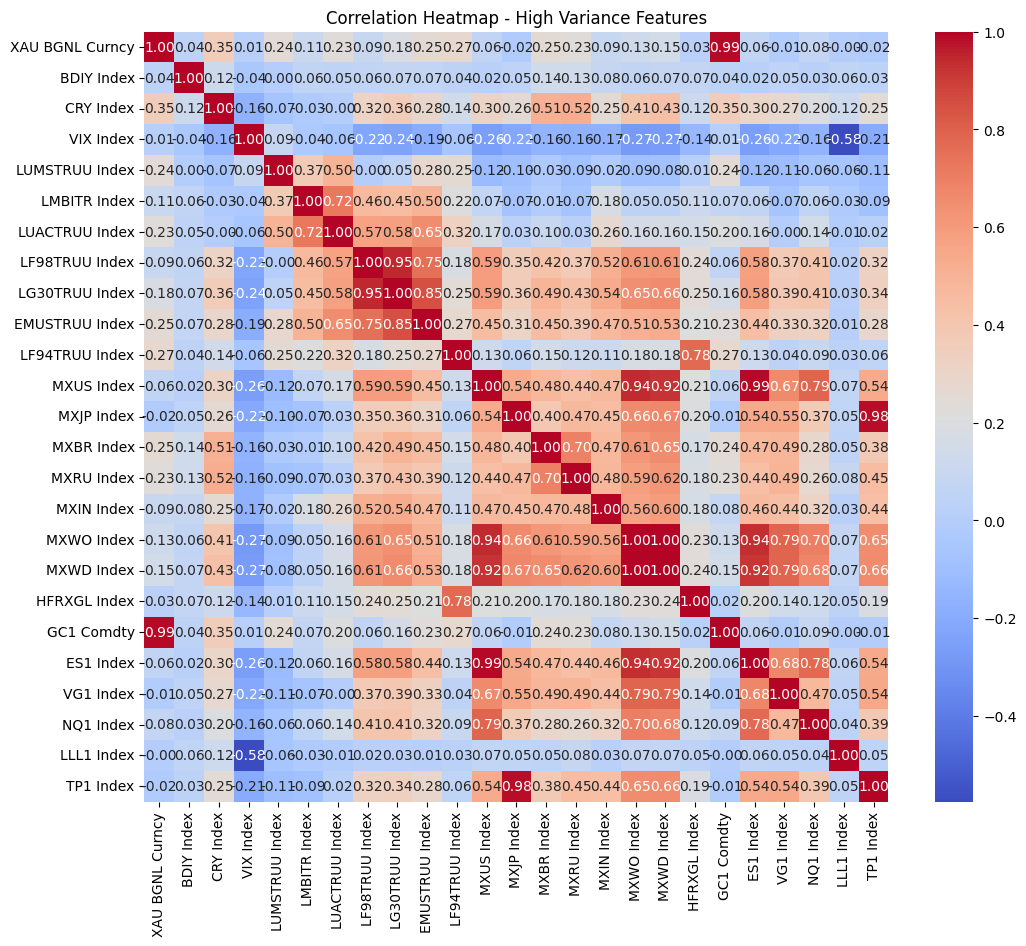

In [15]:
# Compute correlation matrix
correlation_matrix = high_variance_features.corr()

# Visualize the heatmap if features exist
if not correlation_matrix.empty:
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title('Correlation Heatmap - High Variance Features')
    plt.show()
else:
    print("No features meet the criteria for correlation heatmap.")

In [16]:
# Identify highly correlated features
high_corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1.0]  # Exclude self-correlation
redundant_features = set()

for (feature1, feature2), corr_value in high_corr_pairs.items():
    if corr_value > 0.8:
        redundant_features.add(feature2)

# Drop redundant features
data_selected = high_variance_features.drop(columns=redundant_features, errors='ignore')
print(f"Features after removing redundancy: {data_selected.columns.tolist()}")

Features after removing redundancy: ['BDIY Index', 'CRY Index', 'VIX Index', 'LUMSTRUU Index', 'LMBITR Index', 'LUACTRUU Index', 'LF94TRUU Index', 'MXBR Index', 'MXRU Index', 'MXIN Index', 'HFRXGL Index', 'VG1 Index', 'NQ1 Index', 'LLL1 Index']


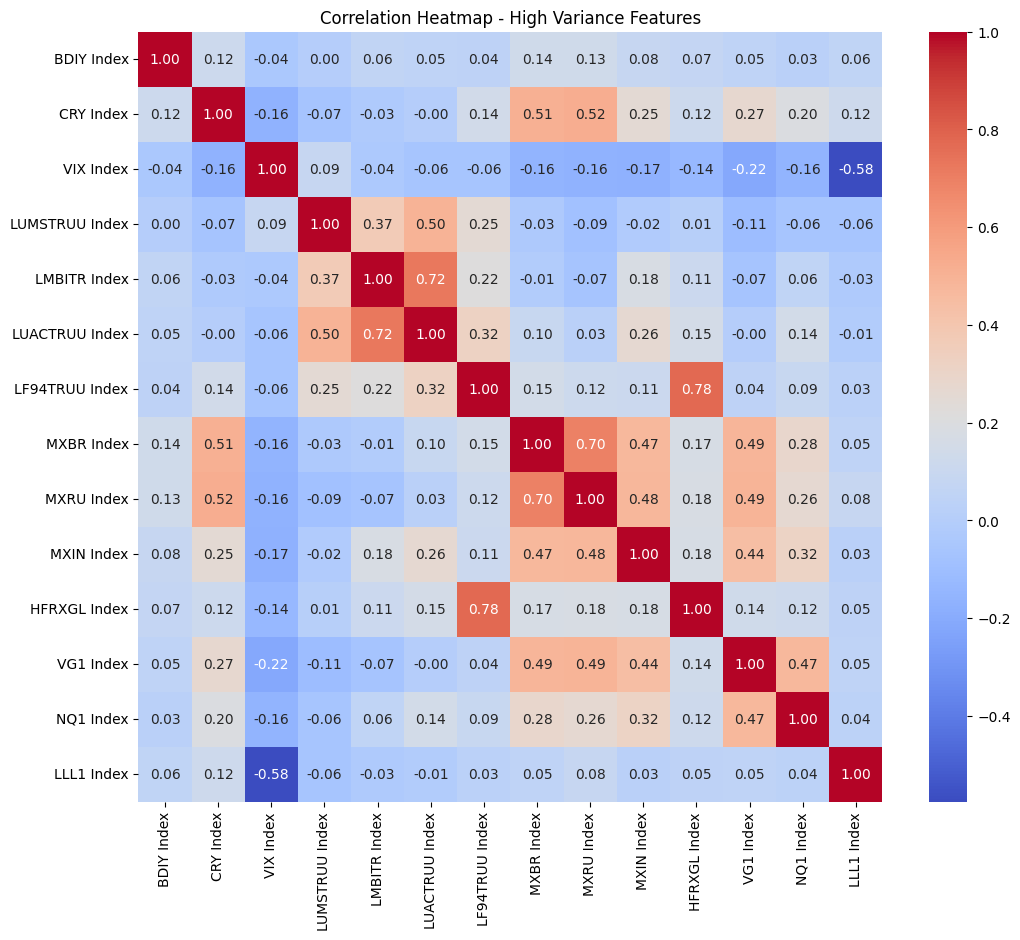

In [17]:
# Compute correlation matrix
correlation_matrix = data_selected.corr()

# Visualize the heatmap if features exist
if not correlation_matrix.empty:
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title('Correlation Heatmap - High Variance Features')
    plt.show()
else:
    print("No features meet the criteria for correlation heatmap.")

In [18]:
data_selected.columns.to_list()

['BDIY Index',
 'CRY Index',
 'VIX Index',
 'LUMSTRUU Index',
 'LMBITR Index',
 'LUACTRUU Index',
 'LF94TRUU Index',
 'MXBR Index',
 'MXRU Index',
 'MXIN Index',
 'HFRXGL Index',
 'VG1 Index',
 'NQ1 Index',
 'LLL1 Index']

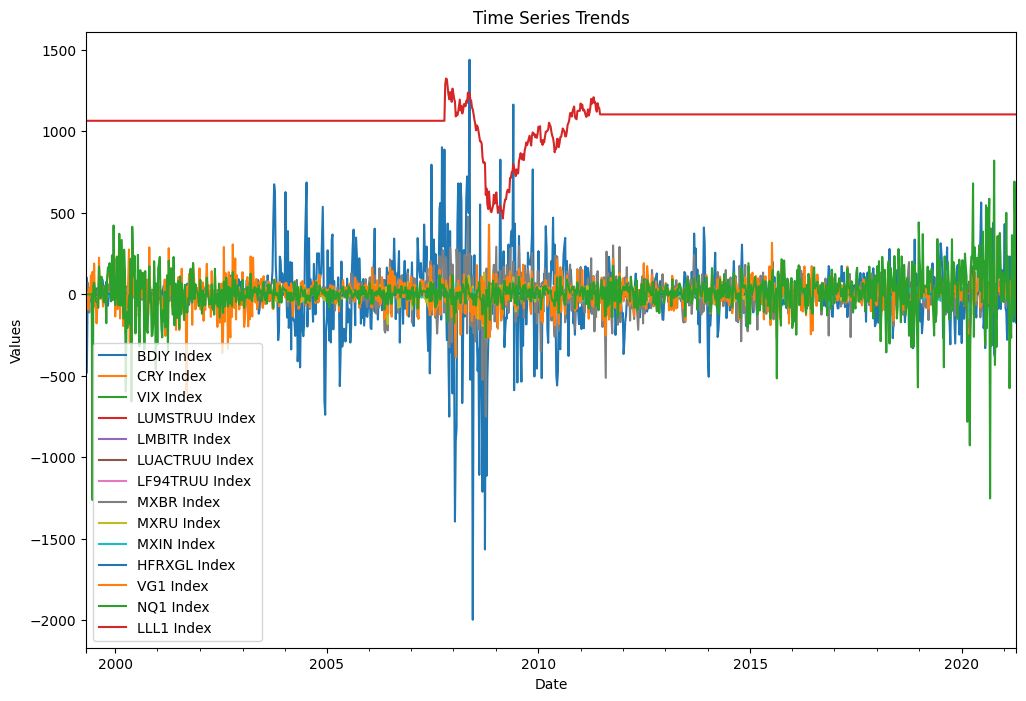

In [19]:
import matplotlib.pyplot as plt

# Plot a subset of features over time
features_to_plot = data_selected.columns.to_list()  # Modify as needed
data[features_to_plot].plot(figsize=(12, 8), title="Time Series Trends")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend(features_to_plot)
plt.show()

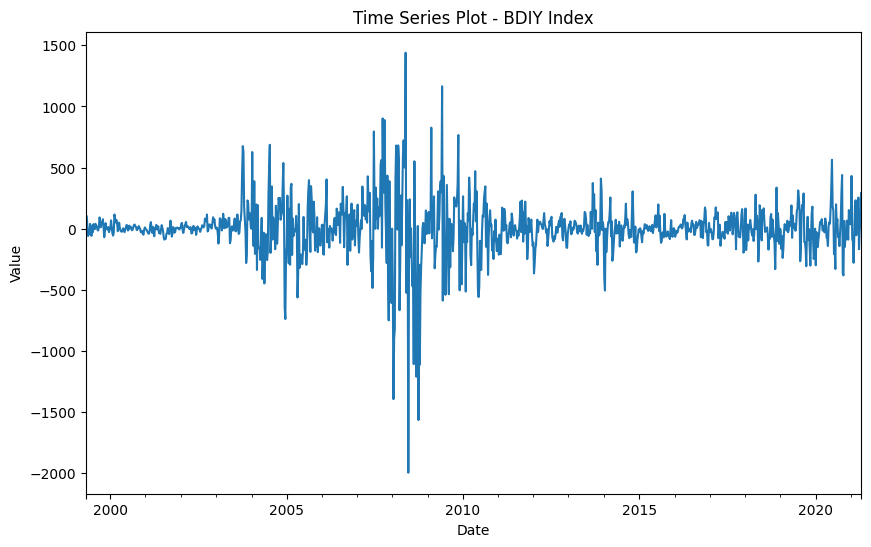

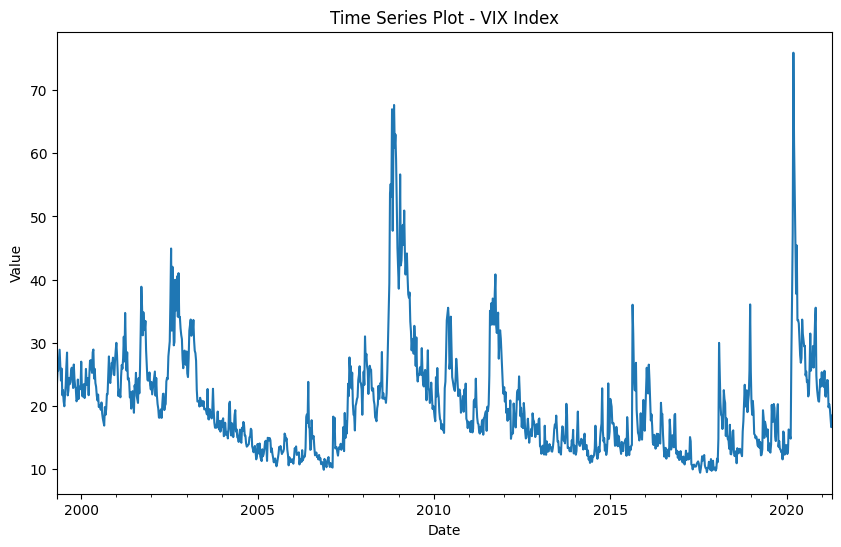

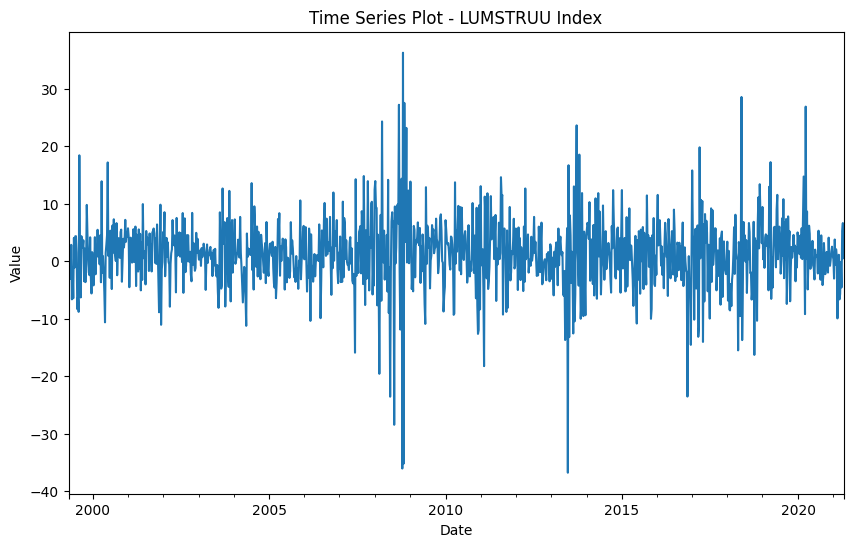

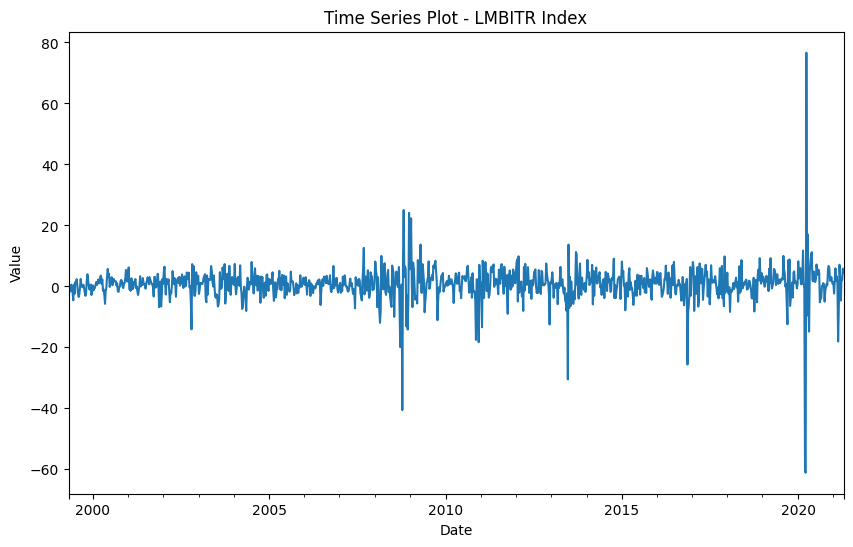

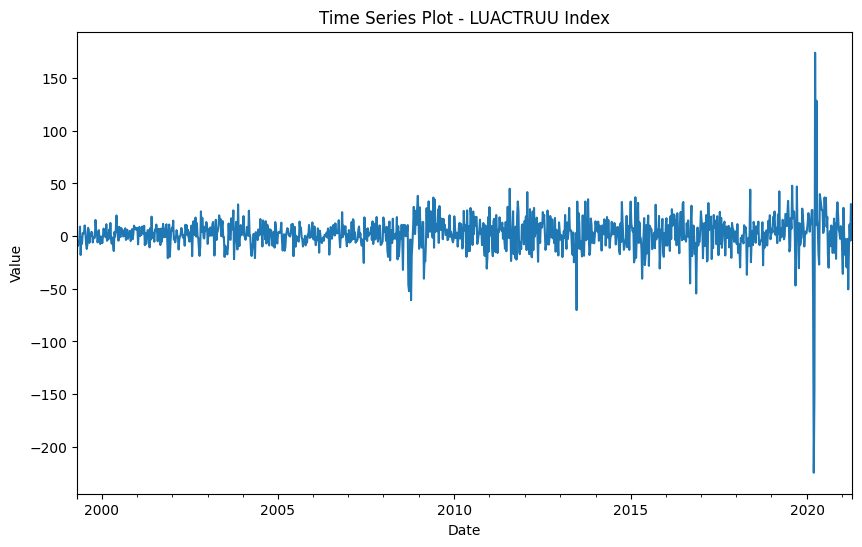

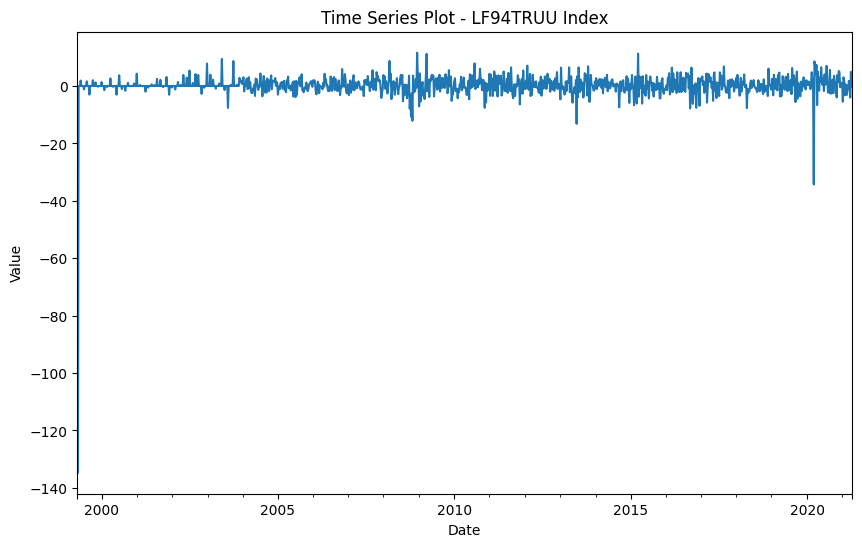

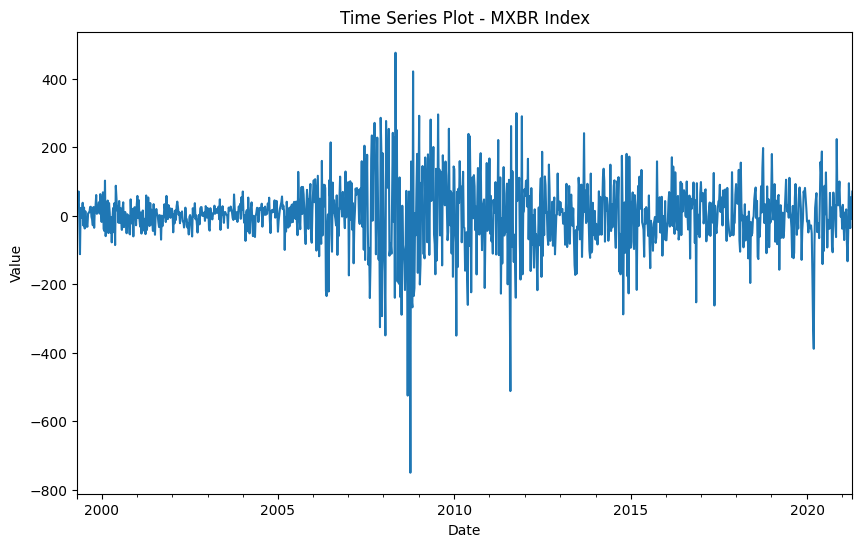

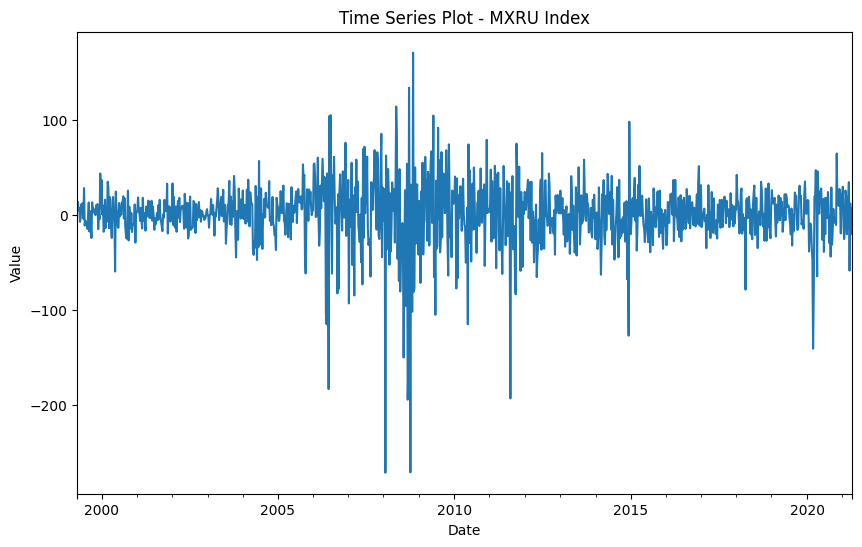

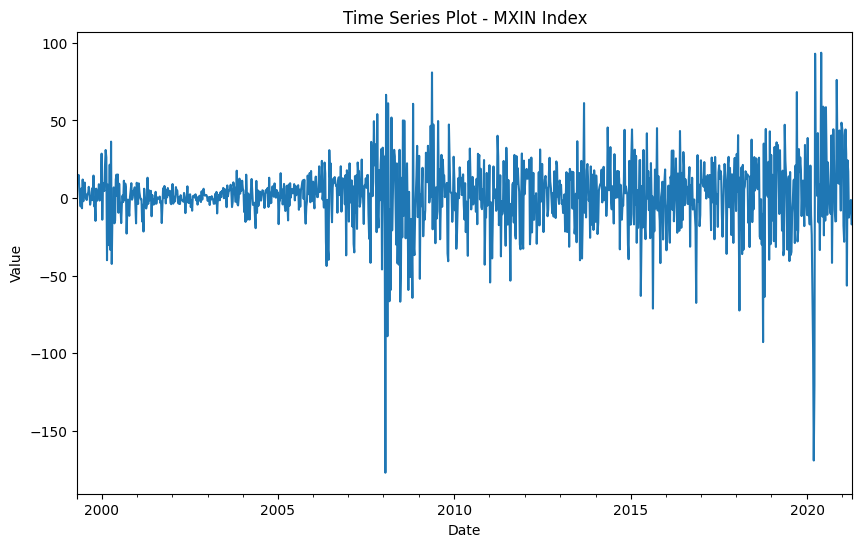

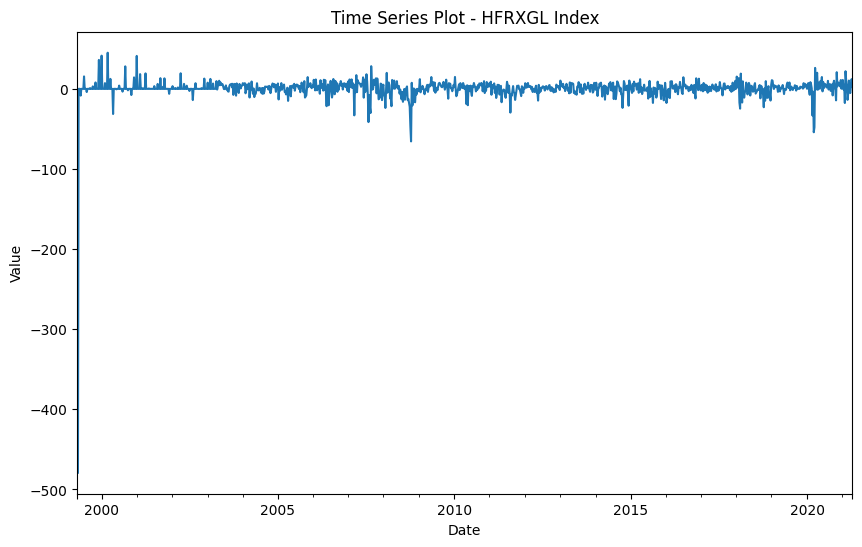

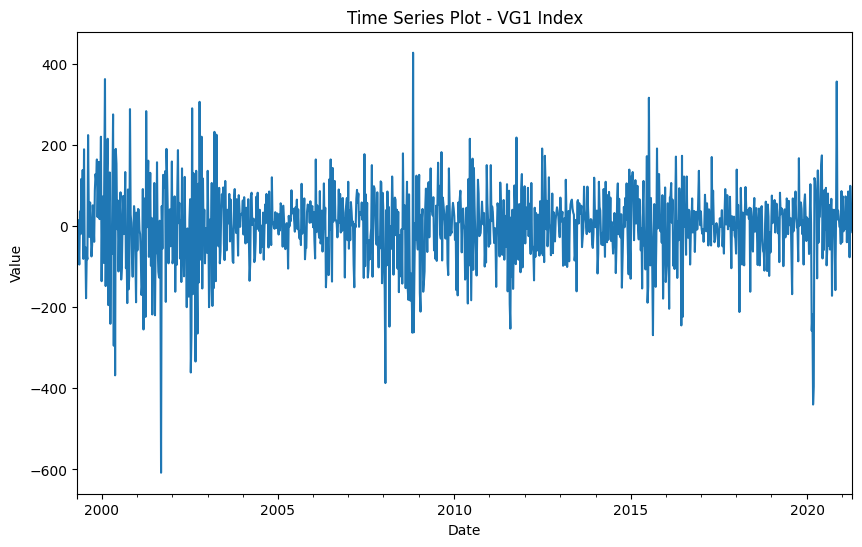

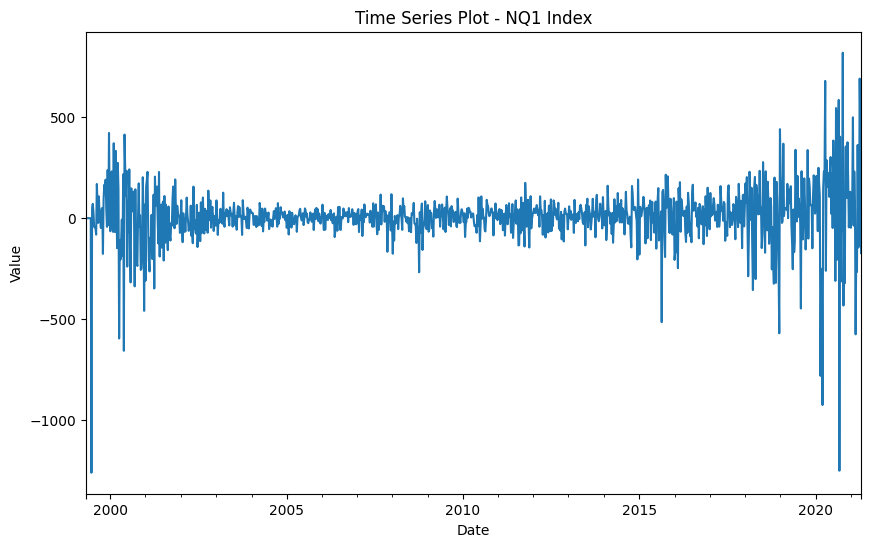

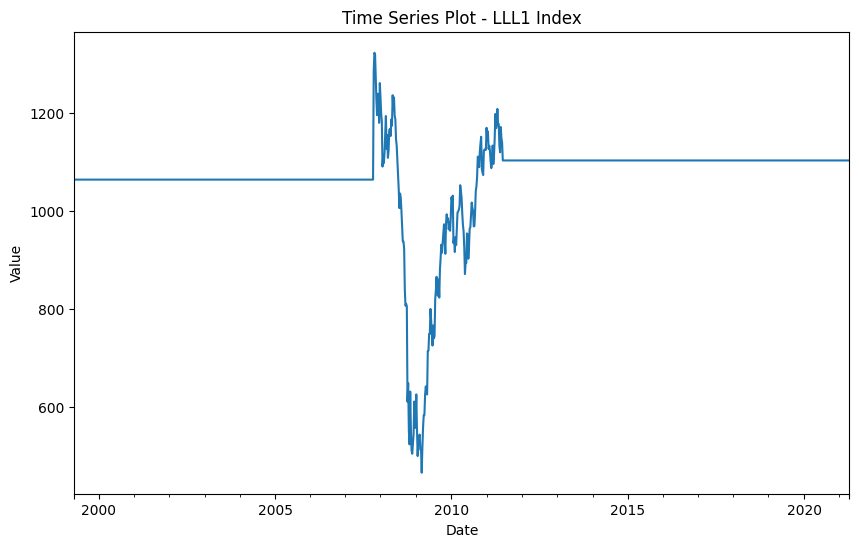

In [20]:
import matplotlib.pyplot as plt

# Automate plotting for a subset of columns
columns_to_plot = data_selected.columns[:15]  # Plot the first 5 columns (adjust as needed)
for column in columns_to_plot:
    data[column].plot(figsize=(10, 6), title=f"Time Series Plot - {column}")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.show()

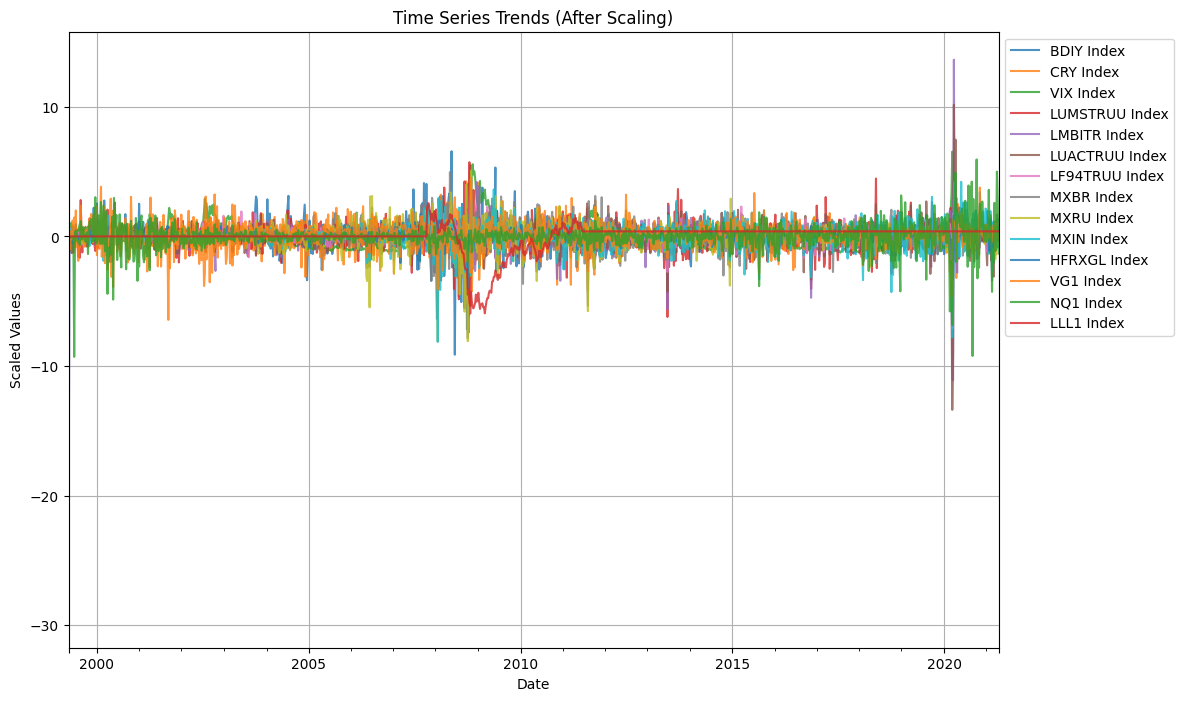

In [21]:
from sklearn.preprocessing import StandardScaler

# Scale only the numeric features
numeric_columns = data_selected.select_dtypes(include='number')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_columns)

# Convert scaled features back to DataFrame with the original index
scaled_data_df = pd.DataFrame(scaled_features, columns=numeric_columns.columns, index=data_selected.index)

# Plot the scaled data with the correct time axis
scaled_data_df.plot(figsize=(12, 8), legend=True, alpha=0.8)
plt.title("Time Series Trends (After Scaling)")
plt.xlabel("Date")
plt.ylabel("Scaled Values")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1.0, 1.0))
plt.show()


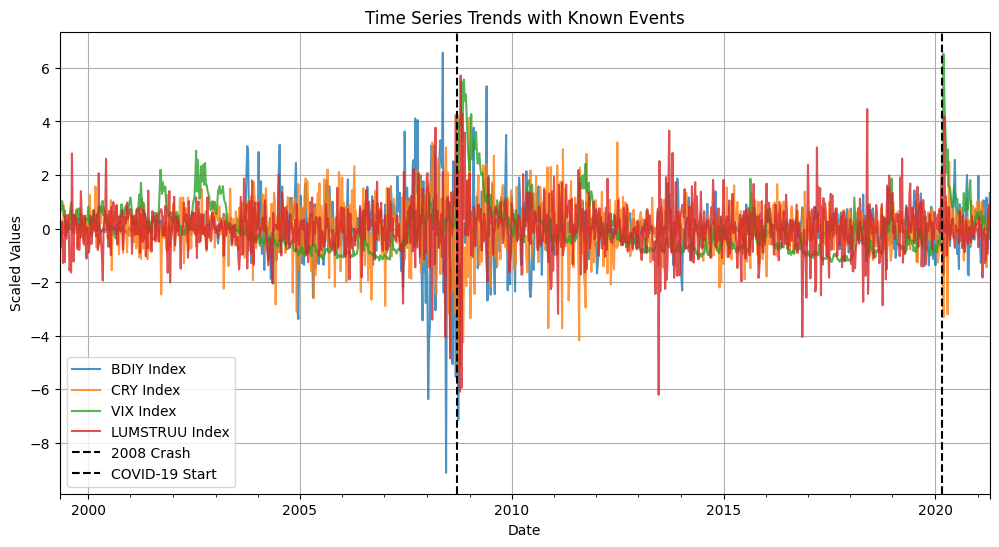

In [22]:
scaled_data_df[['BDIY Index', 'CRY Index', 'VIX Index', 'LUMSTRUU Index']].plot(figsize=(12, 6), alpha=0.8)
# Add vertical lines for known events
plt.axvline(x='2008-09-15', color='black', linestyle='--', label="2008 Crash")
plt.axvline(x='2020-03-01', color='black', linestyle='--', label="COVID-19 Start")
plt.legend()
plt.title("Time Series Trends with Known Events")
plt.xlabel("Date")
plt.ylabel("Scaled Values")
plt.grid()
plt.show()



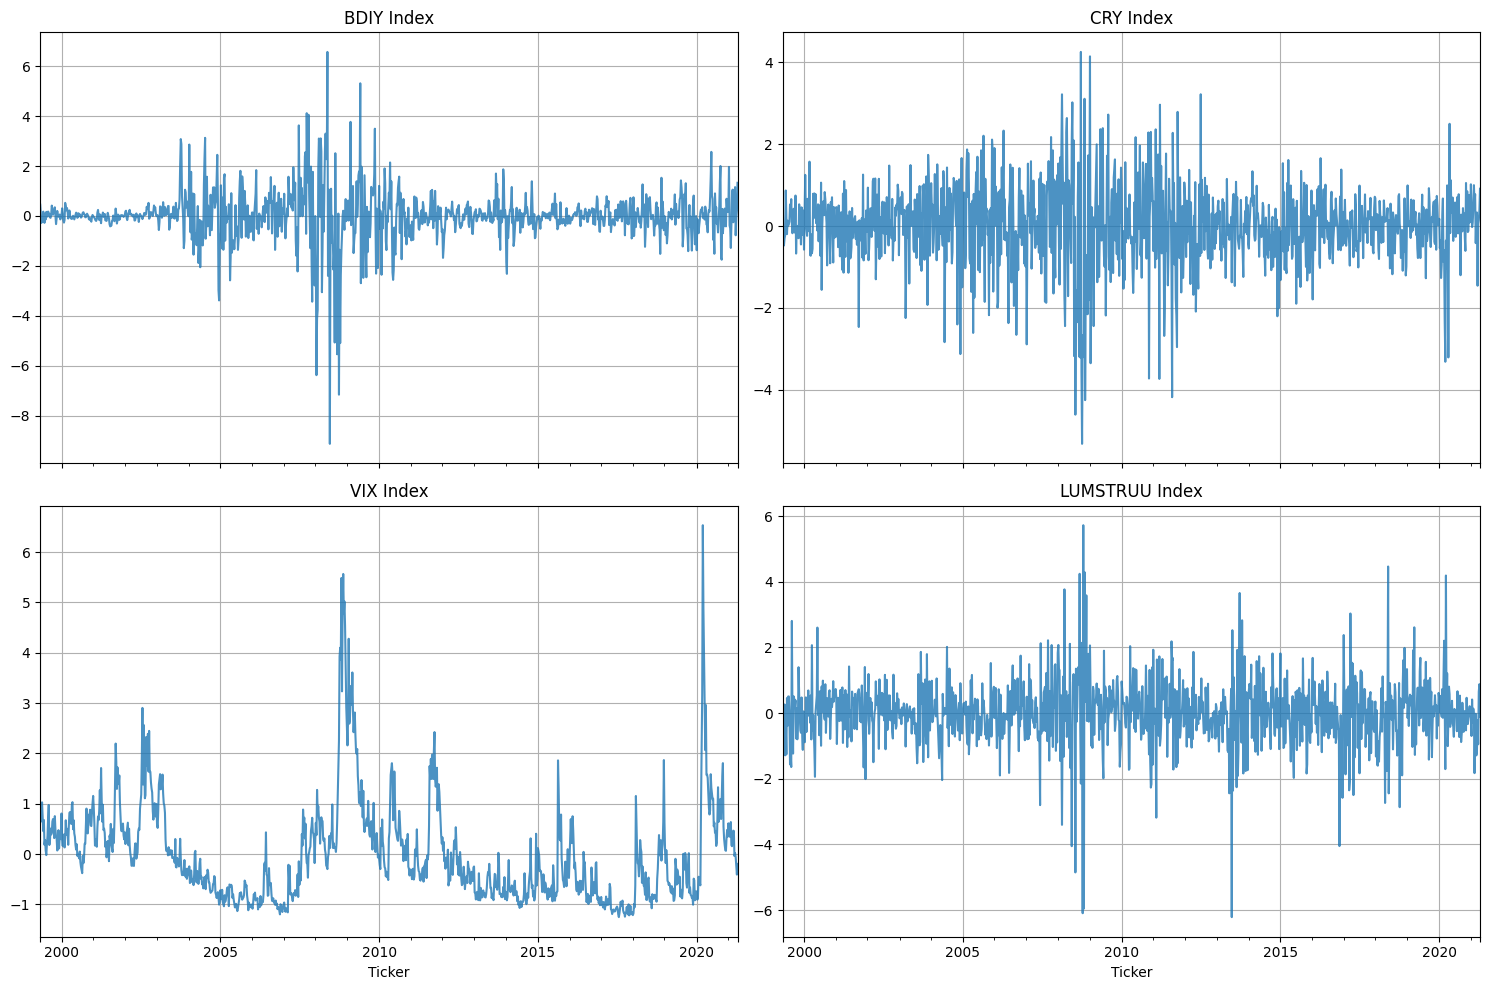

In [23]:
# Create subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharex=True)

# List of selected features
features = ['BDIY Index', 'CRY Index', 'VIX Index', 'LUMSTRUU Index']

for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    scaled_data_df[feature].plot(ax=axes[row, col], title=feature, alpha=0.8)
    axes[row, col].grid()

plt.tight_layout()
plt.show()


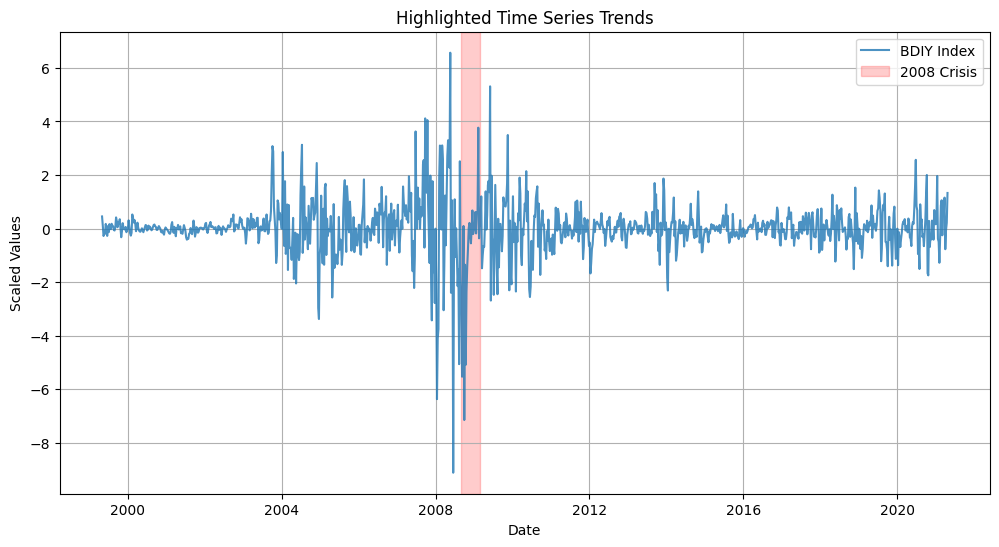

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(scaled_data_df['BDIY Index'], label="BDIY Index", alpha=0.8)
plt.axvspan('2008-09-01', '2009-03-01', color='red', alpha=0.2, label="2008 Crisis")
plt.title("Highlighted Time Series Trends")
plt.xlabel("Date")
plt.ylabel("Scaled Values")
plt.legend()
plt.grid()
plt.show()

# **Test**

In [ ]:
import plotly.express as px

# Example: Plot a few features interactively
fig = px.line(
    scaled_data_df,
    x=scaled_data_df.index,  # Time series index
    y=['BDIY Index', 'CRY Index', 'VIX Index', 'LUMSTRUU Index'],
    title="Interactive Time Series Trends",
    labels={"value": "Scaled Values", "index": "Date"},
)

# Show the interactive plot
fig.show()


In [ ]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add time series lines for each feature
features = ['BDIY Index', 'CRY Index', 'VIX Index', 'LUMSTRUU Index']
for feature in features:
    fig.add_trace(go.Scatter(x=scaled_data_df.index, y=scaled_data_df[feature], mode='lines', name=feature))

# Add annotations for events (e.g., financial crises)
fig.add_shape(type="line", x0='2008-09-01', x1='2009-03-01', y0=-10, y1=10, line=dict(color="red", dash="dot"), name="2008 Crisis")
fig.add_annotation(x='2008-12-01', y=0, text="2008 Financial Crisis", showarrow=True, arrowhead=1)

# Update layout
fig.update_layout(
    title="Time Series Trends with Annotations",
    xaxis_title="Date",
    yaxis_title="Scaled Values",
    legend_title="Features",
)

# Show the figure
fig.show()


In [ ]:
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=features)

# Add each feature to a subplot
for i, feature in enumerate(features):
    row, col = divmod(i, 2)  # Calculate subplot position
    fig.add_trace(go.Scatter(x=scaled_data_df.index, y=scaled_data_df[feature], mode='lines', name=feature), row=row+1, col=col+1)

# Update layout
fig.update_layout(height=600, width=800, title_text="Time Series Subplots")
fig.show()


In [ ]:
# Calculate rolling mean and std for one feature
rolling_mean = scaled_data_df['BDIY Index'].rolling(window=30).mean()
rolling_std = scaled_data_df['BDIY Index'].rolling(window=30).std()

# Create a Plotly figure
fig = go.Figure()

# Add original data
fig.add_trace(go.Scatter(x=scaled_data_df.index, y=scaled_data_df['BDIY Index'], mode='lines', name='Original Data'))

# Add rolling mean
fig.add_trace(go.Scatter(x=scaled_data_df.index, y=rolling_mean, mode='lines', name='Rolling Mean', line=dict(dash='dash')))

# Add rolling std
fig.add_trace(go.Scatter(x=scaled_data_df.index, y=rolling_std, mode='lines', name='Rolling Std', line=dict(dash='dot')))

# Update layout
fig.update_layout(title="Rolling Statistics for BDIY Index", xaxis_title="Date", yaxis_title="Scaled Values")
fig.show()


# **Modeling**

In [25]:
# Split the dataset into training and testing sets
train_size = int(0.7 * len(scaled_data_df))  # Use 70% for training
train_data = scaled_data_df.iloc[:train_size].copy()
test_data = scaled_data_df.iloc[train_size:].copy()

print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)


Training Data Shape: (802, 14)
Testing Data Shape: (345, 14)


In [26]:
# Ensure consistent numeric features between train and test
features = train_data.columns  # Use all columns for now; ensure these are numeric

# Verify the features are consistent
print("Features for Modeling:", features)


Features for Modeling: Index(['BDIY Index', 'CRY Index', 'VIX Index', 'LUMSTRUU Index',
       'LMBITR Index', 'LUACTRUU Index', 'LF94TRUU Index', 'MXBR Index',
       'MXRU Index', 'MXIN Index', 'HFRXGL Index', 'VG1 Index', 'NQ1 Index',
       'LLL1 Index'],
      dtype='object')


In [27]:
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # 1% contamination

# Fit the model on the training data
iso_forest.fit(train_data)

# Predict anomalies (-1 = anomaly, 1 = normal)
train_data['Anomaly'] = iso_forest.predict(train_data)
test_data['Anomaly'] = iso_forest.predict(test_data)



In [28]:
# from sklearn.ensemble import IsolationForest
# import matplotlib.pyplot as plt

# # Function to run Isolation Forest with varying contamination
# def run_isolation_forest(data, contamination, features):
#     iso_forest = IsolationForest(contamination=contamination, n_estimators=100, random_state=42)
#     iso_forest.fit(data[features])
#     data['Anomaly'] = iso_forest.predict(data[features])  # -1 = anomaly, 1 = normal
#     return data

# # Experiment with contamination levels
# contamination_levels = [0.01, 0.02, 0.03, 0.05]
# results = {}

# for level in contamination_levels:
#     results[level] = run_isolation_forest(train_data.copy(), contamination=level, features=features)

# # Visualize anomalies for each contamination level
# key_features = ['BDIY Index', 'CRY Index', 'VIX Index']

# for level, result in results.items():
#     for feature in key_features:
#         plt.figure(figsize=(10, 6))
#         plt.plot(result.index, result[feature], label=feature, alpha=0.6, color='blue')
#         plt.scatter(
#             result.index[result['Anomaly'] == -1],
#             result.loc[result['Anomaly'] == -1, feature],
#             color='red',
#             label='Anomalies',
#             alpha=0.8,
#         )
#         plt.title(f"Isolation Forest with Contamination={level} on {feature}")
#         plt.xlabel('Date')
#         plt.ylabel('Scaled Values')
#         plt.legend()
#         plt.grid()
#         plt.show()


In [29]:
# Calculate the proportion of anomalies
train_anomalies = train_data['Anomaly'].value_counts(normalize=True)
test_anomalies = test_data['Anomaly'].value_counts(normalize=True)

print("Proportion of Anomalies in Training Data:")
print(train_anomalies)

print("\nProportion of Anomalies in Testing Data:")
print(test_anomalies)


Proportion of Anomalies in Training Data:
Anomaly
 1    0.948878
-1    0.051122
Name: proportion, dtype: float64

Proportion of Anomalies in Testing Data:
Anomaly
 1    0.965217
-1    0.034783
Name: proportion, dtype: float64


In [30]:
# Define historical crash events with their approximate dates
historical_crashes = {
    "Dot-com Bubble Burst": "2000-03-10",
    "Global Financial Crisis": "2008-09-15",
    "COVID-19 Crash": "2020-03-16"
}

# Convert these dates to datetime objects
import pandas as pd
historical_crashes = pd.DataFrame.from_dict(historical_crashes, orient='index', columns=['Date'])
historical_crashes['Date'] = pd.to_datetime(historical_crashes['Date'])

print(historical_crashes)


                              Date
Dot-com Bubble Burst    2000-03-10
Global Financial Crisis 2008-09-15
COVID-19 Crash          2020-03-16


In [31]:
# Combine predictions into the original scaled_data
scaled_data_df['Anomaly'] = pd.concat([train_data['Anomaly'], test_data['Anomaly']], axis=0)
scaled_data_df['Anomaly_Flag'] = (scaled_data_df['Anomaly'] == -1).astype(int)

<Figure size 1200x800 with 0 Axes>

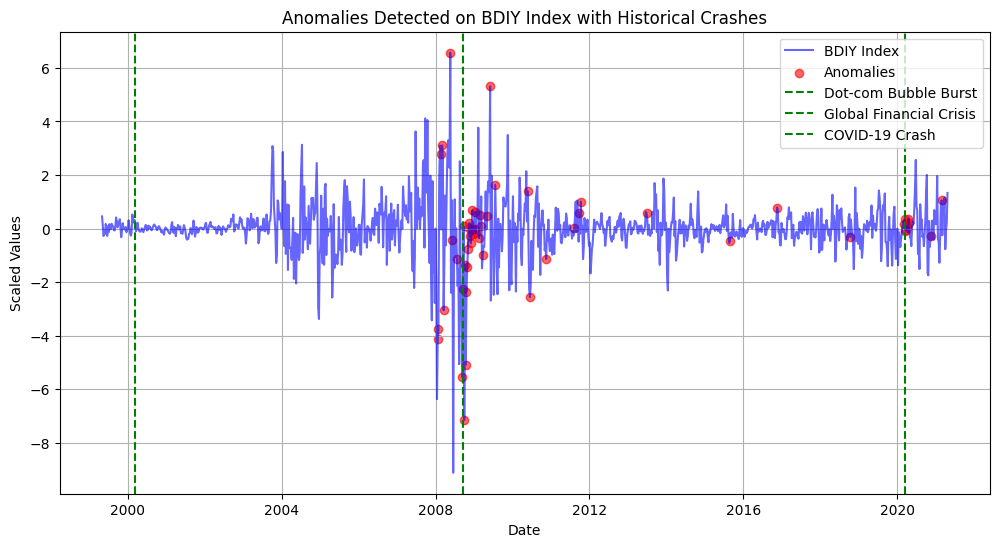

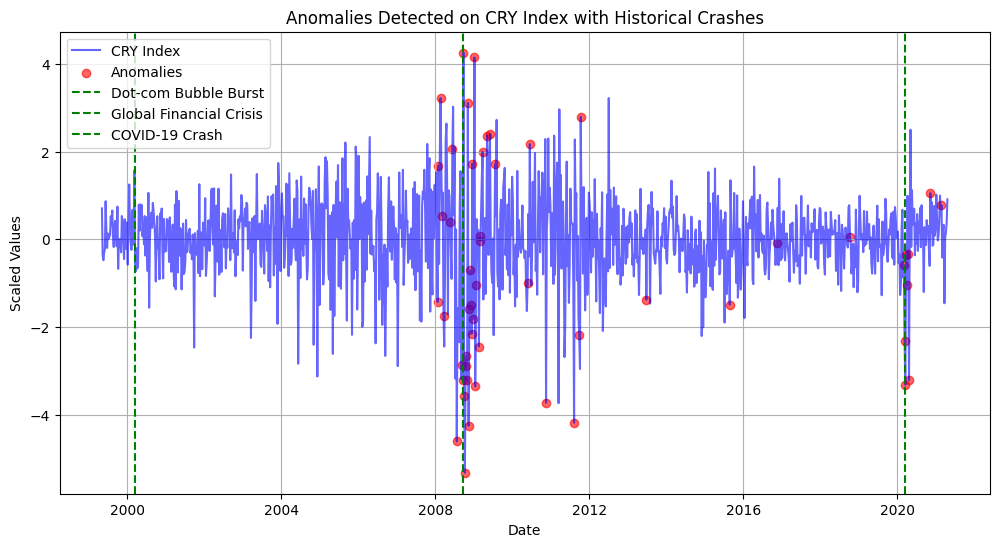

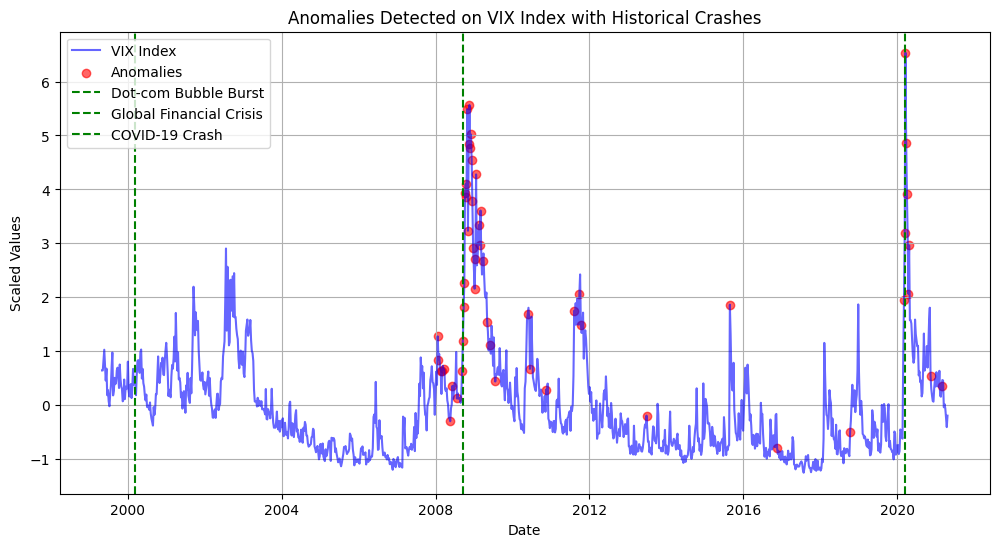

In [32]:
# Step 4: Define Features for Analysis
key_features = ['BDIY Index', 'CRY Index', 'VIX Index']

# Step 5: Plot Anomalies with Historical Events
plt.figure(figsize=(12, 8))

for feature in key_features:
    plt.figure(figsize=(12, 6))
    # Plot the feature
    plt.plot(scaled_data_df.index, scaled_data_df[feature], label=f"{feature}", color='blue', alpha=0.6)

    # Overlay anomalies
    anomalies = scaled_data_df[scaled_data_df['Anomaly_Flag'] == 1]
    plt.scatter(anomalies.index, anomalies[feature], color='red', label='Anomalies', alpha=0.6)

    # Overlay historical crashes
    for event, crash_date in historical_crashes.itertuples():
        plt.axvline(crash_date, color='green', linestyle='--', label=event)

    plt.title(f"Anomalies Detected on {feature} with Historical Crashes")
    plt.xlabel("Date")
    plt.ylabel("Scaled Values")
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

In [33]:
# Step 6: Display Correlation Matrices
correlation_matrix = scaled_data_df[key_features].corr()
print("Correlation Matrix for Features:\n", correlation_matrix)

# Anomalies Correlation
anomaly_matrix = scaled_data_df[scaled_data_df['Anomaly_Flag'] == 1][key_features].corr()
print("Correlation Matrix for Anomalies:\n", anomaly_matrix)

Correlation Matrix for Features:
             BDIY Index  CRY Index  VIX Index
BDIY Index    1.000000   0.117957  -0.043243
CRY Index     0.117957   1.000000  -0.163800
VIX Index    -0.043243  -0.163800   1.000000
Correlation Matrix for Anomalies:
             BDIY Index  CRY Index  VIX Index
BDIY Index    1.000000   0.360015  -0.129878
CRY Index     0.360015   1.000000  -0.318438
VIX Index    -0.129878  -0.318438   1.000000


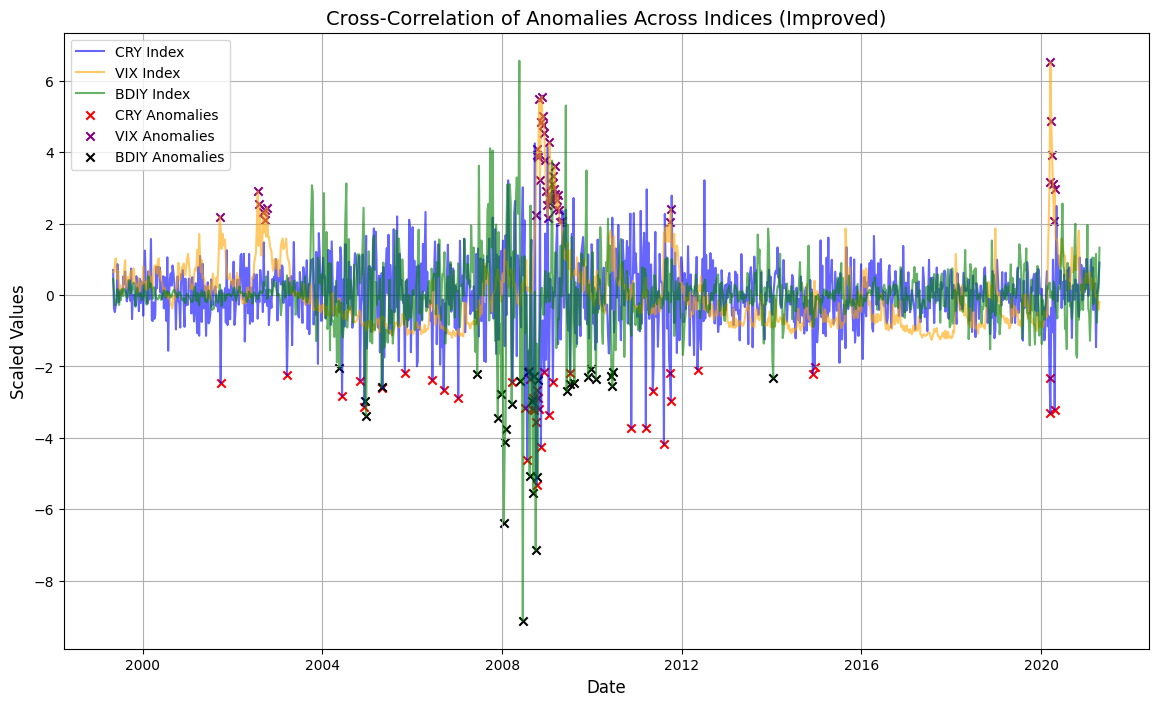

In [34]:
# Filter anomalies for key indices with adjusted thresholds
cry_threshold = -2  # Adjust based on CRY Index distribution
vix_threshold = 2   # Adjust based on VIX Index distribution
bdiy_threshold = -2  # Adjust based on BDIY Index distribution

anomaly_indices_cry = scaled_data_df[scaled_data_df['CRY Index'] < cry_threshold]
anomaly_indices_vix = scaled_data_df[scaled_data_df['VIX Index'] > vix_threshold]
anomaly_indices_bdiy = scaled_data_df[scaled_data_df['BDIY Index'] < bdiy_threshold]

# Enhanced Plot
plt.figure(figsize=(14, 8))

# Plot time series
plt.plot(scaled_data_df.index, scaled_data_df['CRY Index'], label="CRY Index", color="blue", alpha=0.6)
plt.plot(scaled_data_df.index, scaled_data_df['VIX Index'], label="VIX Index", color="orange", alpha=0.6)
plt.plot(scaled_data_df.index, scaled_data_df['BDIY Index'], label="BDIY Index", color="green", alpha=0.6)

# Overlay anomalies
plt.scatter(anomaly_indices_cry.index, anomaly_indices_cry['CRY Index'], label="CRY Anomalies", color="red", marker="x")
plt.scatter(anomaly_indices_vix.index, anomaly_indices_vix['VIX Index'], label="VIX Anomalies", color="purple", marker="x")
plt.scatter(anomaly_indices_bdiy.index, anomaly_indices_bdiy['BDIY Index'], label="BDIY Anomalies", color="black", marker="x")

# Add title and labels
plt.title("Cross-Correlation of Anomalies Across Indices (Improved)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Scaled Values", fontsize=12)
plt.legend()
plt.grid()
plt.show()


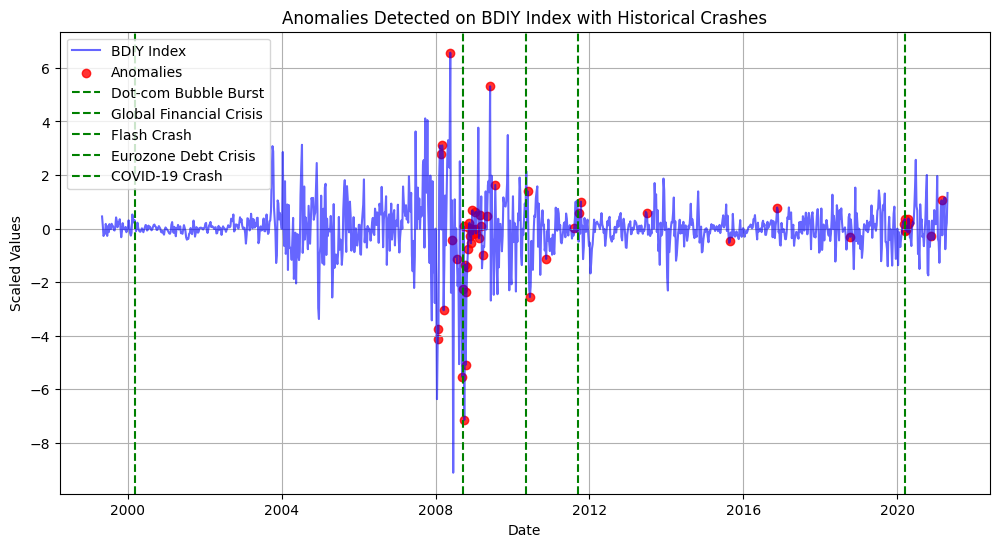

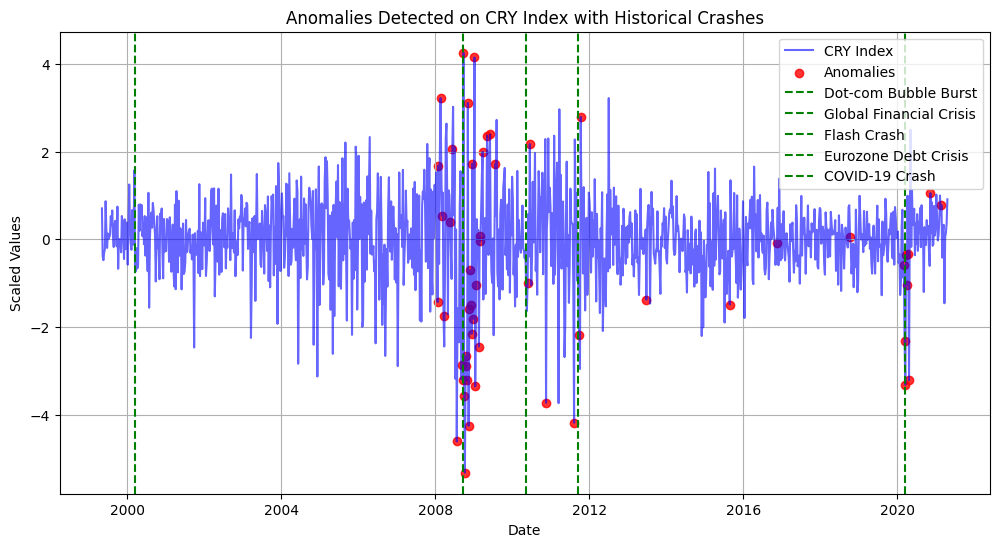

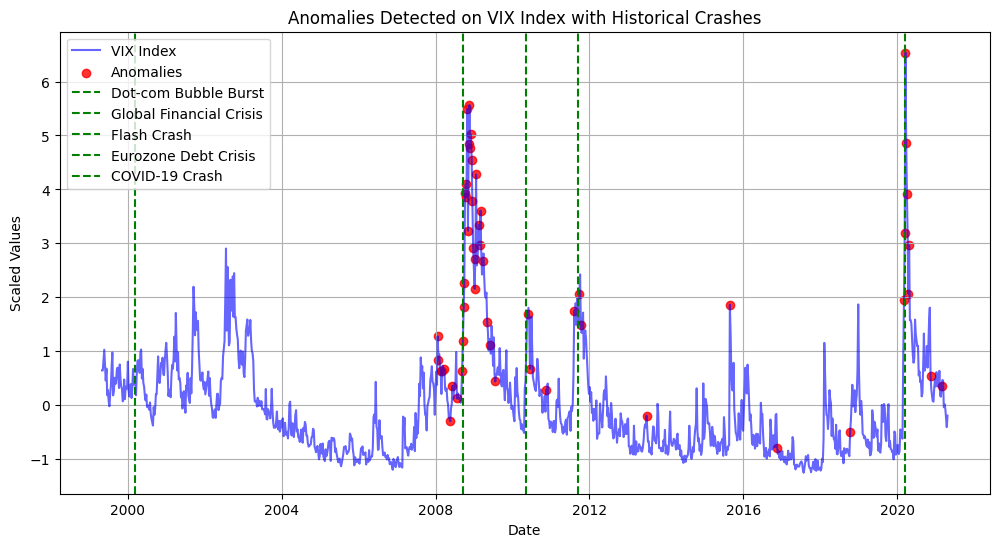

In [35]:

# Define refined historical crash events
historical_crashes = {
    "Dot-com Bubble Burst": "2000-03-10",
    "Global Financial Crisis": "2008-09-15",
    "Flash Crash": "2010-05-06",
    "Eurozone Debt Crisis": "2011-09-15",
    "COVID-19 Crash": "2020-03-16"
}

# Convert to DataFrame with datetime
import pandas as pd
historical_crashes_df = pd.DataFrame.from_dict(historical_crashes, orient='index', columns=['Date'])
historical_crashes_df['Date'] = pd.to_datetime(historical_crashes_df['Date'])

# Plot anomalies with historical events
key_features = ['BDIY Index', 'CRY Index', 'VIX Index']  # Indices to analyze

for feature in key_features:
    plt.figure(figsize=(12, 6))

    # Plot the feature's time series
    plt.plot(
        scaled_data_df.index,
        scaled_data_df[feature],
        label=feature,
        color='blue',
        alpha=0.6
    )

    # Overlay anomalies
    anomalies = scaled_data_df[scaled_data_df['Anomaly'] == -1]
    plt.scatter(
        anomalies.index,
        anomalies[feature],
        color='red',
        label='Anomalies',
        alpha=0.8
    )

    # Overlay historical crash events
    for event, row in historical_crashes_df.iterrows():
        plt.axvline(x=row['Date'], color='green', linestyle='--', label=event)

    # Add title and labels
    plt.title(f"Anomalies Detected on {feature} with Historical Crashes")
    plt.xlabel("Date")
    plt.ylabel("Scaled Values")
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

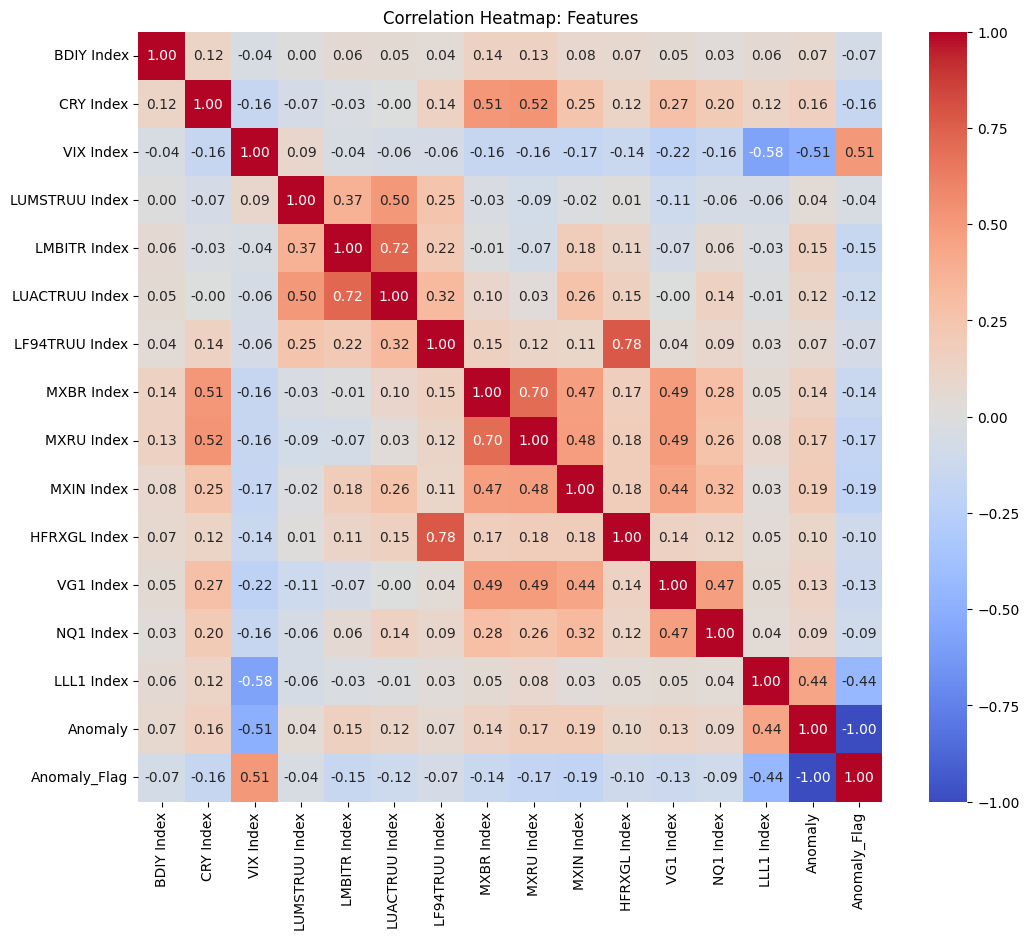

In [36]:
# Compute correlation matrix for selected features
feature_correlation_matrix = scaled_data_df.corr()

# Visualize the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(
    feature_correlation_matrix,
    annot=True, cmap='coolwarm', fmt='.2f', cbar=True
)
plt.title("Correlation Heatmap: Features")
plt.show()



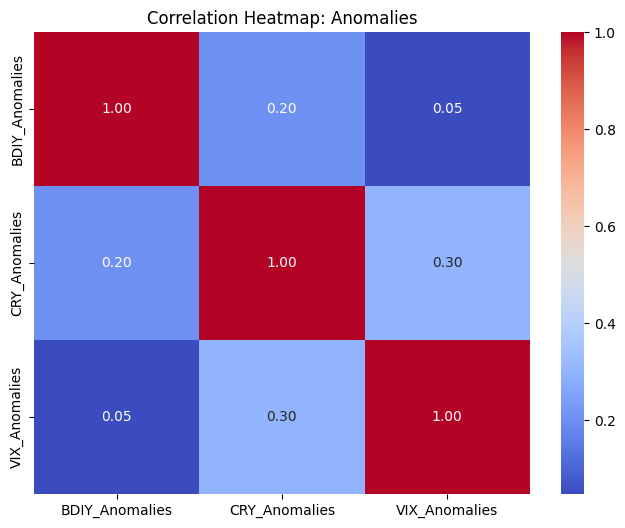

Anomaly Correlation Matrix:
                BDIY_Anomalies  CRY_Anomalies  VIX_Anomalies
BDIY_Anomalies        1.000000       0.202761       0.048138
CRY_Anomalies         0.202761       1.000000       0.300236
VIX_Anomalies         0.048138       0.300236       1.000000


In [37]:
# Create anomaly flags for key indices
anomaly_data = pd.DataFrame({
    'BDIY_Anomalies': (scaled_data_df['BDIY Index'] < -2).astype(int),
    'CRY_Anomalies': (scaled_data_df['CRY Index'] < -2).astype(int),
    'VIX_Anomalies': (scaled_data_df['VIX Index'] > 2).astype(int)
})

# Compute the correlation matrix for anomaly flags
anomaly_correlation_matrix = anomaly_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    anomaly_correlation_matrix,
    annot=True, cmap='coolwarm', fmt='.2f', cbar=True
)
plt.title("Correlation Heatmap: Anomalies")
plt.show()

# Print the matrix for reference
print("Anomaly Correlation Matrix:")
print(anomaly_correlation_matrix)


In [54]:
from google.colab import auth
auth.authenticate_user()


In [55]:
!git clone https://github.com/Alienware2000/Market-Anomaly-Detection.git


Cloning into 'Market-Anomaly-Detection'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [ ]:
import shutil

# Define paths
notebook_path = "/content/Market_anomaly_detection.ipynb"  # Current notebook location
repo_path = "/content/Market-Anomaly-Detection/"  # Repository folder

# Move the notebook
shutil.move(notebook_path, repo_path)
